# Loading Drug-Target Interaction Datasets

This notebook covers:
- Loading the Davis, KIBA, BindingDB, Metz datasets
- Merging them into a single dataframe
- Filtering based on molecular properties
- Visualizing distributions, overlaps, and statistics
- Saving the merged dataset as a csv file

Unique drug-target interaction pairs: 447.436
- Unique drugs: 162.026
- Unique targets: 2.705
- Ratio observed: 0.105%

In [1]:
import os

# Set the working directory to the root of the project
os.chdir("/home/robsyc/Desktop/thesis/MB-VAE-DTI")

In [2]:
# Import the necessary functions from the loading module
from mb_vae_dti.loading import (
    load_or_create_merged_dataset,
    get_dataset_stats,
    plot_interaction_distribution,
    plot_dataset_statistics,
    plot_dataset_overlap,
    plot_promiscuity_analysis
)

03:34:38 - INFO - Old pandas version detected. Patching DataFrame.map to DataFrame.applymap


## Load, merge and filter the datasets


In [3]:
# Load the merged dataset & apply filters
df = load_or_create_merged_dataset(
    dataset_names=["DAVIS", "KIBA", "BindingDB_Kd", "BindingDB_Ki", "Metz"], 
    # dataset_names=["DAVIS", "KIBA"],
    force_reload=False,
    apply_filters=True,
    verbose=True
)

Loading existing merged dataset from data/processed/merged_BindingDB_Kd_BindingDB_Ki_DAVIS_KIBA_Metz_filtered.csv


In [4]:
# Get statistics of the merged dataset
get_dataset_stats(df)

{'n_interactions': 447436,
 'n_unique_drugs': 162026,
 'n_unique_targets': 2705,
 'avg_drug_smiles_length': 52.552796377582496,
 'avg_target_aa_length': 536.9660152513433,
 'Y_pKd_mean': 5.687022318217582,
 'Y_pKd_std': 1.2010130718830354,
 'Y_pKd_min': 1.999999995657055,
 'Y_pKd_max': 10.0,
 'Y_KIBA_mean': 11.70627341827158,
 'Y_KIBA_std': 0.82103579237372,
 'Y_KIBA_min': 0.0,
 'Y_KIBA_max': 17.196910013,
 'Y_pKi_mean': 6.705943670899221,
 'Y_pKi_std': 1.47320892552395,
 'Y_pKi_min': 1.999999995657055,
 'Y_pKi_max': 10.1,
 'in_DAVIS_count': 23188,
 'in_DAVIS_percentage': 5.182417150162258,
 'in_KIBA_count': 105361,
 'in_KIBA_percentage': 23.547725261266418,
 'in_BindingDB_Kd_count': 37010,
 'in_BindingDB_Kd_percentage': 8.271574035169275,
 'in_BindingDB_Ki_count': 283081,
 'in_BindingDB_Ki_percentage': 63.26737231693471,
 'in_Metz_count': 30689,
 'in_Metz_percentage': 6.858858026622802}

## Visualize the merged dataset

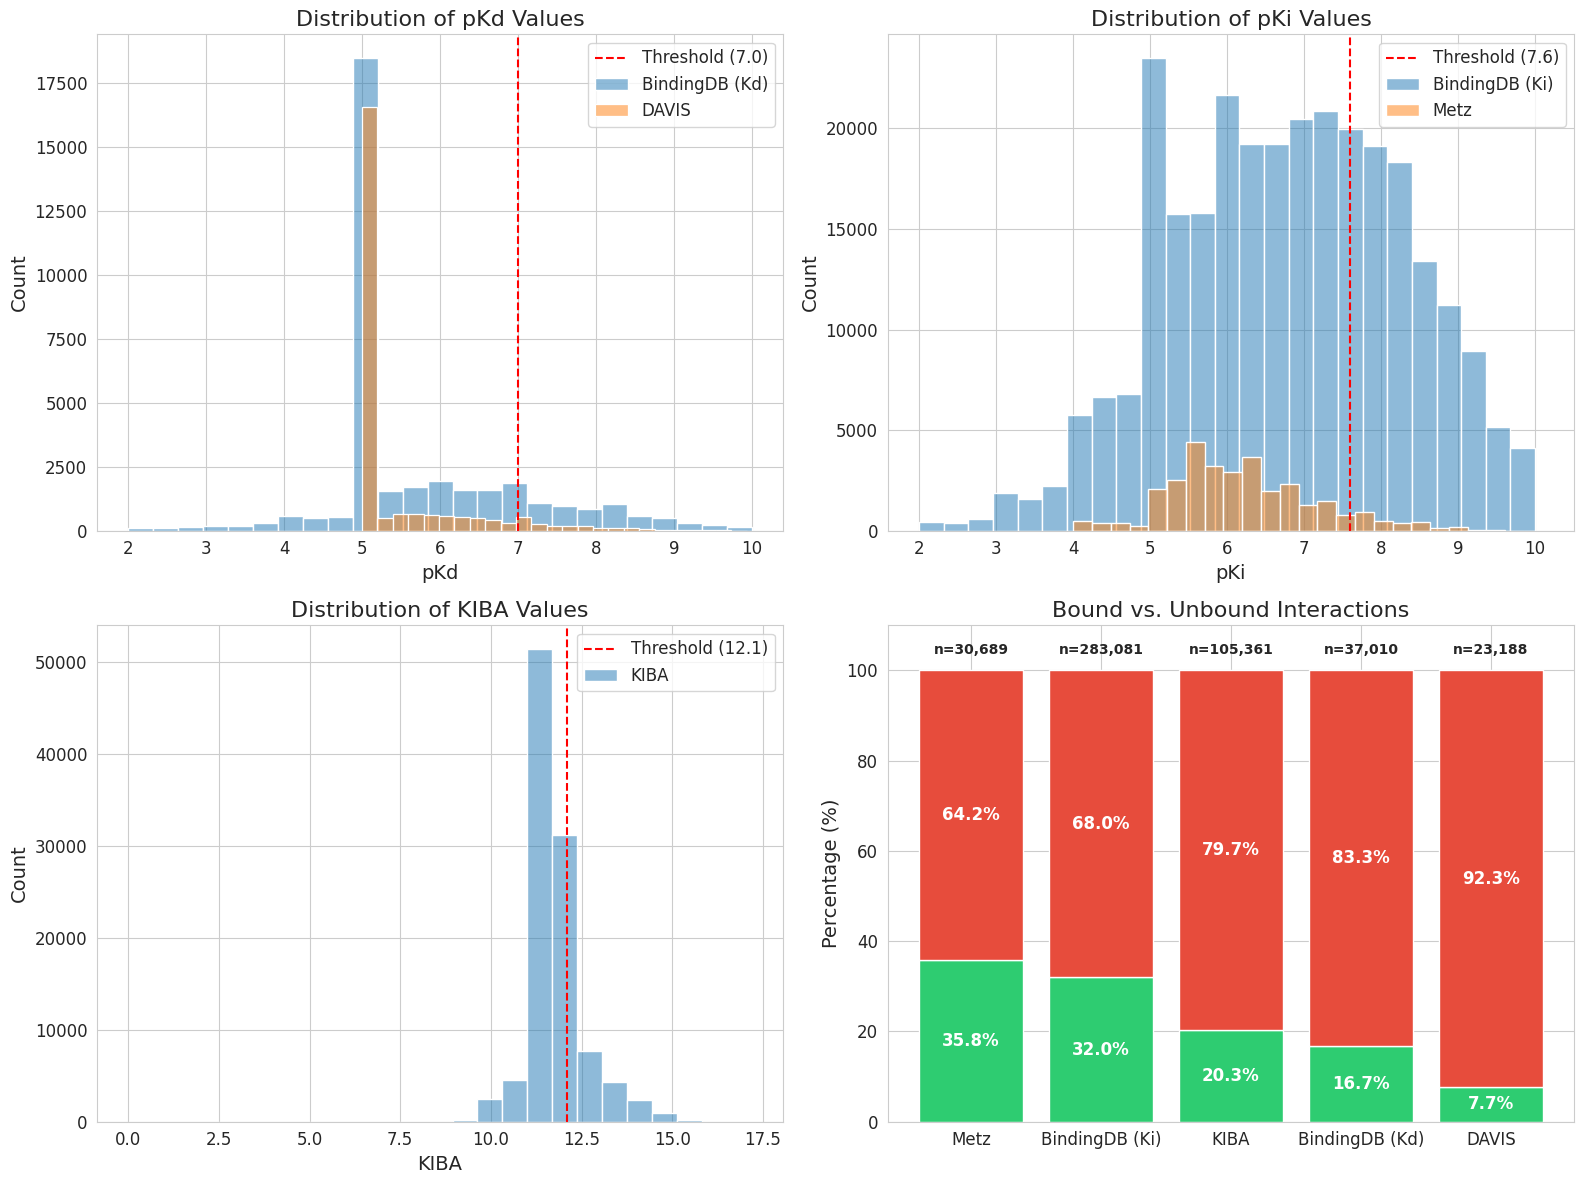

'data/images/interaction_distribution.png'

In [5]:
df_Davis = df[df['in_DAVIS'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKd = df[df['in_BindingDB_Kd'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKi = df[df['in_BindingDB_Ki'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_Metz = df[df['in_Metz'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_KIBA = df[df['in_KIBA'] == True].drop(columns = ['Y_pKd', 'Y_pKi'])

# df_Davis = df[df['in_DAVIS'] == True].drop(columns = ['Y_KIBA'])
# df_KIBA = df[df['in_KIBA'] == True].drop(columns = ['Y_pKd'])

plot_interaction_distribution(
    [df_BDBKd, df_Davis, df_BDBKi, df_Metz, df_KIBA],
    ["BindingDB (Kd)", "DAVIS", "BindingDB (Ki)", "Metz", "KIBA"],
    # [df_Davis, df_KIBA],
    # ["DAVIS", "KIBA"],
    save_path="data/images/interaction_distribution.png"
)

In [6]:
# plot_dataset_statistics(df)

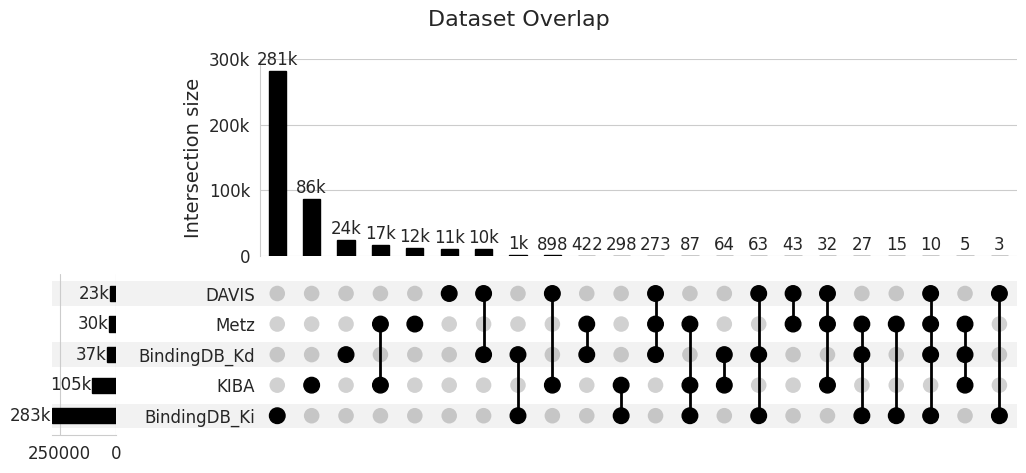

'data/images/dataset_overlap.png'

In [7]:
# This UpSet plot shows
# - the number of unique interactions per dataset
# - the overlap between datasets
plot_dataset_overlap(df)

In [ ]:
plot_promiscuity_analysis(df)

Drug Interaction Statistics:
Drugs with 0 interactions: 0 (0.0%)
Drugs with 1 interaction: 90,144 (55.6%)
Mean interactions per drug: 2.8
Median interactions per drug: 1.0
Max interactions per drug: 390
Percentiles:
25th: 1, 50th: 1, 75th: 2
90th: 4, 95th: 4, 99th: 20

Target Interaction Statistics:
Targets with 0 interactions: 0 (0.0%)
Targets with 1 interaction: 362 (13.4%)
Mean interactions per target: 165.4
Median interactions per target: 17.0
Max interactions per target: 6,624
Percentiles:
25th: 3, 50th: 17, 75th: 108
90th: 514, 95th: 908, 99th: 1979



In [9]:
df

,Drug_SMILES,Target_AA,Y,Y_pKd,Y_KIBA,Y_pKi,in_DAVIS,in_KIBA,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz
0,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,False,4.999996,NaN,NaN,True,False,True,False,False
1,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,True,8.920819,NaN,NaN,True,False,False,False,False
2,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,True,7.995679,NaN,NaN,True,False,False,False,False
3,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,False,4.999996,NaN,NaN,True,False,True,False,False
4,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,False,4.999996,NaN,NaN,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
447431,CN(c1ncccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F...,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,False,NaN,NaN,6.3,False,False,False,False,True
447432,CN(c1ncccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F...,MDHPSREKDERQRTTKPMAQRSAHCSRPSGSSSSSGVLMVGPNFRV...,False,NaN,NaN,5.4,False,False,False,False,True
447433,CN(c1ncccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F...,MQGHFPAERREGRPRRGTRGQQQLLVSPRFLRAWHPPPVSARMPTR...,False,NaN,NaN,7.0,False,False,False,False,True
447434,CN(c1ncccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F...,MGERSAYQRLAGGEEGPQRLGGGRMQPEEGTGWLLELLSEVQLQQY...,False,NaN,NaN,5.9,False,False,False,False,True


---

In [10]:
from mb_vae_dti.loading.annotation import generate_unique_ids, add_potential_ids

df_drugs, df_targets = generate_unique_ids(df, verbose=True)
df_drugs, df_targets = add_potential_ids(df_drugs, df_targets, verbose=True)
df_targets

Generating unique IDs for drugs and targets...
Generated 162026 unique drug IDs and 2705 unique target IDs
Adding potential IDs from all datasets...
Using cached potential IDs...
Added 159290 potential drug IDs to 158233/162026 drugs
Added 3064 potential target IDs to 2705/2705 targets


,Target_AA,Target_ID,Potential_ID
0,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,T000001,"{Q2M2I8, AAK1}"
1,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,T000002,{ABL1p}
2,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,T000003,{ABL2}
3,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,T000004,"{ACVR1, Q04771}"
4,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,T000005,"{P36896, ACVR1B}"
...,...,...,...
2700,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,T002701,{SRC}
2701,MSRESDVEAQQSHGSSACSQPHGSVTQSQGSSSQSQGISSSSTSTM...,T002702,{CHEK2}
2702,MGAPACALALCVAVAIVAGASSESLGTEQRVVGRAAEVPGPEPGQQ...,T002703,{FGFR3}
2703,MQGHFPAERREGRPRRGTRGQQQLLVSPRFLRAWHPPPVSARMPTR...,T002704,{MATK}


In [11]:
from mb_vae_dti.loading.drug_annotation import annotate_drug

result = annotate_drug(
    smiles=df_drugs.iloc[0]['Drug_SMILES'],
    potential_ids=df_drugs.iloc[0]['Potential_ID'],
    verbose=True
)
result

DrugAnnotation(smiles='Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1', inchikey='KTUFNOKKBVMGRW-UHFFFAOYSA-N', valid=True)

In [55]:
from mb_vae_dti.loading.target_annotation import annotate_target

result = annotate_target(
    aa_sequence=df_targets.iloc[0]['Target_AA'],        # MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...
    potential_ids=df_targets.iloc[0]['Potential_ID'],   # {Q2M2I8, AAK1}
    verbose=True
)
result

Trying potential ID: Q2M2I8
Protein info: {'uniprot_id': 'Q2M2I8', 'aa_sequence': 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDE

TargetAnnotation(aa_sequence='MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL', dna_se

In [57]:
from mb_vae_dti.loading.annotation import annotate_targets

annotated_targets = annotate_targets(df_targets, verbose=True)

Annotating targets with potential IDs...
Processing 2705 targets...
Found 2705 targets with potential IDs
Trying potential ID: Q2M2I8
Protein info: {'uniprot_id': 'Q2M2I8', 'aa_sequence': 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMT

KeyError: 'aa_sequence'

In [ ]:
annotated_targets